# Pokemon Analysis
**Authors:** Ricky Wong
***

## Overview

### Business Understanding

In [1]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [2]:
#read data from file
pokemon_df = pd.read_csv('data/Pokemon.csv')

### Data Understanding
- Half of the pokemon don't have second type
- Mega evolutions should be removed as that is more game mechanic 
- Max stats between legendary and non-legendary are not too different. Legendary has larger mean as they don't have to evolve. We can keep legendary pokemon in our analysis.
- Data seems to be positively skewed.

In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
# check stats for legendary pokemon
pokemon_df.loc[pokemon_df['Legendary'] == True].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [7]:
# check stats for non-legendary
pokemon_df.loc[pokemon_df['Legendary'] == False].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,208.590419,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,175.500000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,346.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,533.500000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,715.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


In [8]:
# number of unique types
unique = pokemon_df['Type 1'].unique()
print(unique)
len(unique)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


18

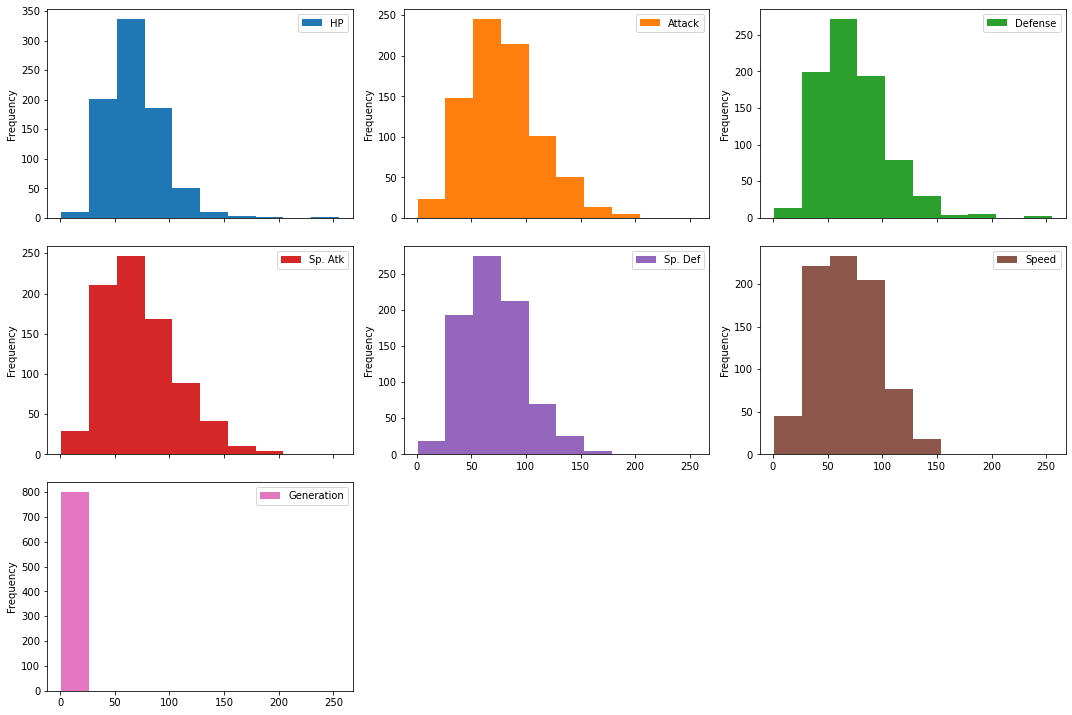

In [9]:
# We will be removing Total as that is all the stats added together.
pokemon_df.iloc[:,5:12].plot.hist(subplots = True, layout=(3,3), figsize=(15,10))
plt.tight_layout()
plt.show()

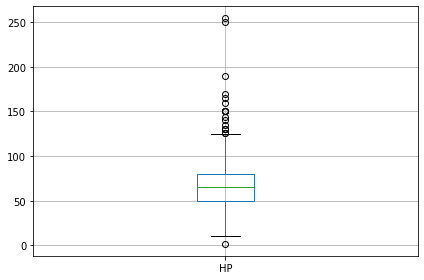

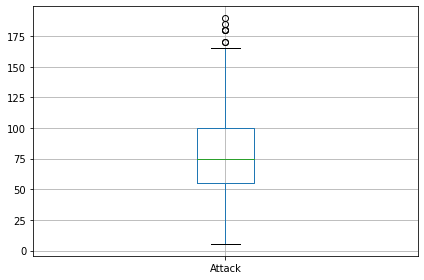

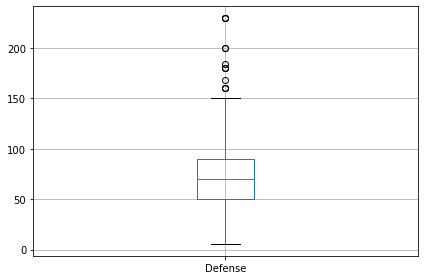

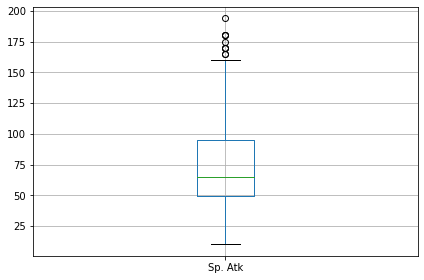

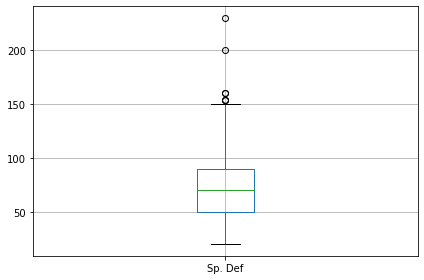

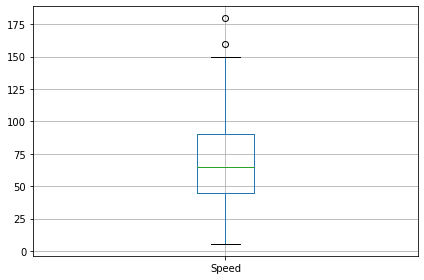

In [10]:
# box plots of stats
columns = pokemon_df.iloc[:,5:11].columns

for c in columns:
    pokemon_df[[c]].boxplot()
    plt.tight_layout()
    plt.show()

In [11]:
# outliers to remove
remove_pokemon1 = pokemon_df[pokemon_df['HP'] >= 200]
remove_pokemon2 =pokemon_df[pokemon_df['Defense'] >= 200]
remove_pokemon3 =pokemon_df[pokemon_df['Sp. Def'] >= 200]

remove_pokemon = pd.concat([remove_pokemon1, remove_pokemon2, remove_pokemon3], axis=0).drop_duplicates()
remove_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True


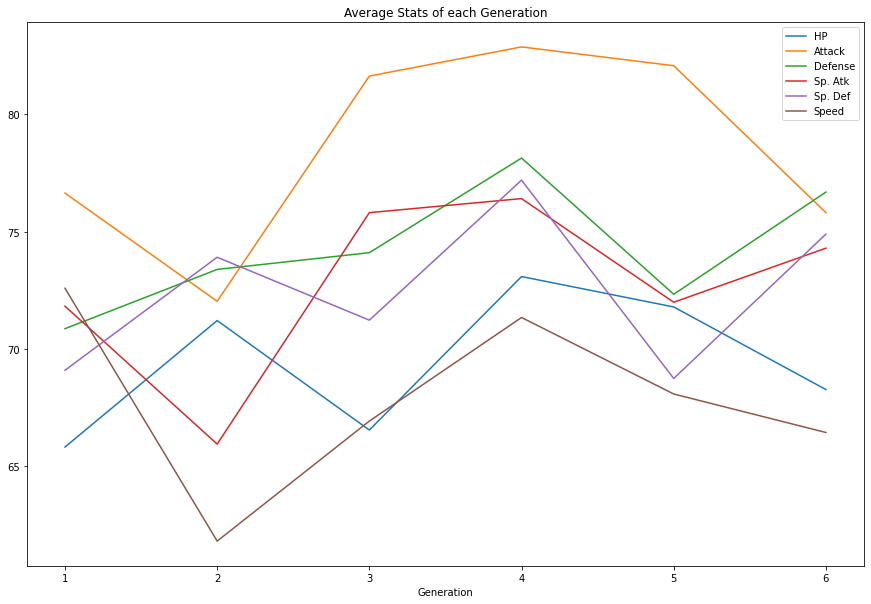

In [12]:
# average stats for each generation
pokemon_stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon_stats_by_generation = pokemon_df.groupby('Generation').mean()[pokemon_stats]
pokemon_stats_by_generation.plot.line(figsize=(15,10), title='Average Stats of each Generation');

### Data Preparation
- Remove mega evolutions
- remove other columns that we don't need

In [13]:
pokemon_clean_df = pokemon_df.copy(deep=True)
pokemon_clean_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [14]:
# Remove outliers
pokemon_clean_df.drop(remove_pokemon['Name'].index, axis=0, inplace=True)

In [15]:
# remove mega evolutions
pokemon_clean_df.drop(pokemon_clean_df[pokemon_clean_df['Name'].str.contains('Mega')].index, inplace=True)
pokemon_clean_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [16]:
# remove pokedex number and name. 
# remove type 2 to simplify
# remove total
# remove legendary
pokemon_clean_df.drop(['#','Name','Type 2','Total','Legendary'], axis=1, inplace=True)
pokemon_clean_df.reset_index(drop=True, inplace=True)
pokemon_clean_df

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,45,49,49,65,65,45,1
1,Grass,60,62,63,80,80,60,1
2,Grass,80,82,83,100,100,80,1
3,Fire,39,52,43,60,50,65,1
4,Fire,58,64,58,80,65,80,1
...,...,...,...,...,...,...,...,...
740,Dragon,108,100,121,81,95,95,6
741,Rock,50,100,150,100,150,50,6
742,Psychic,80,110,60,150,130,70,6
743,Psychic,80,160,60,170,130,80,6


### Multicollinearity check
- No correlations over 0.75 apart from itself.
- Attack, Special Attack and Special Defence are highly correlated with our dependant variable

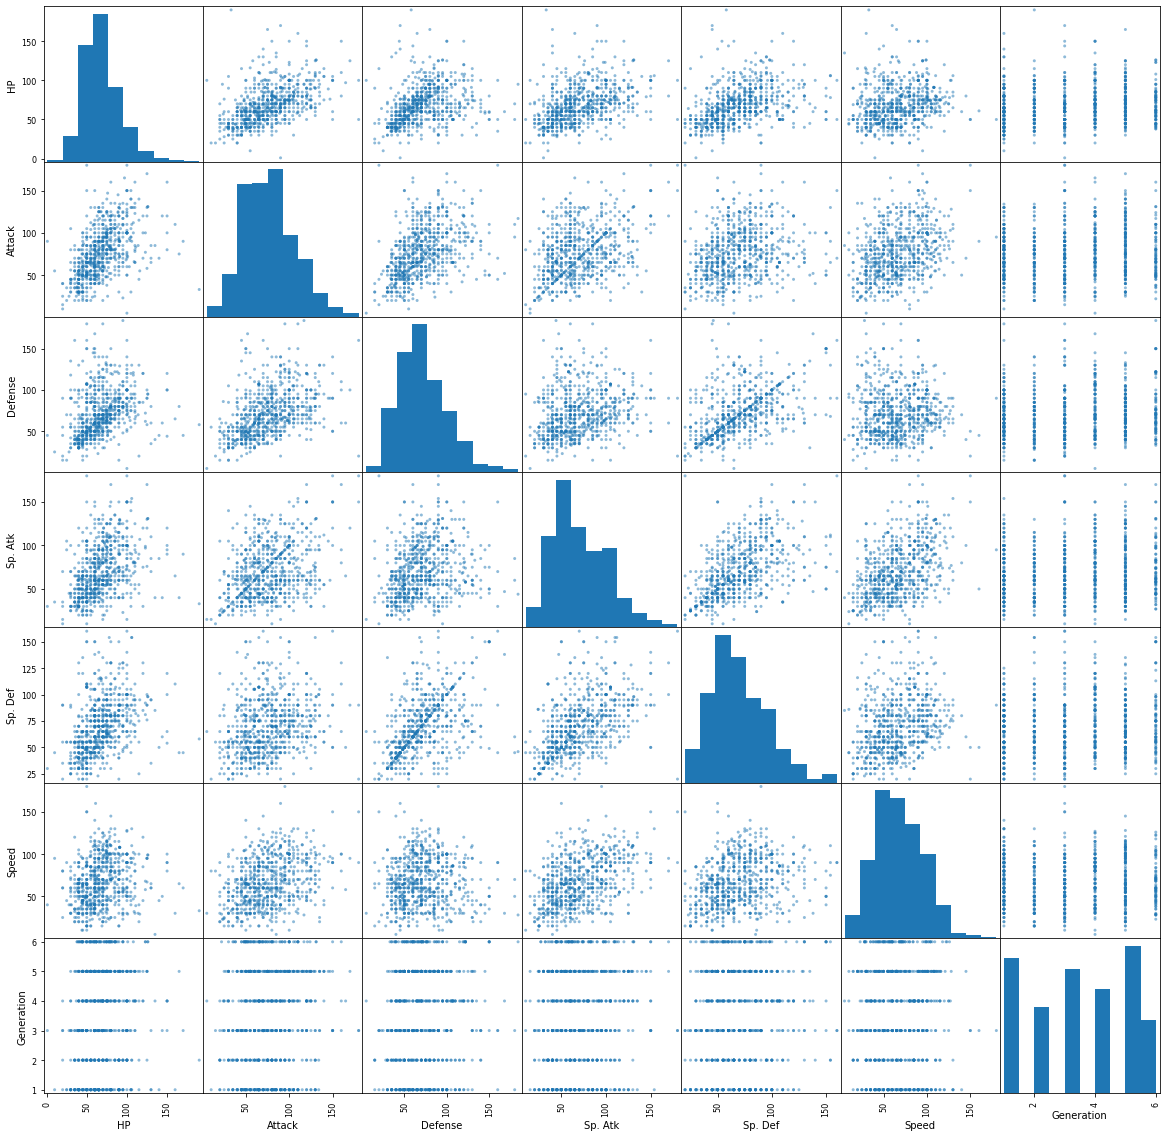

In [17]:
stat_predictors = pokemon_clean_df.iloc[:,1:8]
pd.plotting.scatter_matrix(stat_predictors, figsize  = [20, 20]);
plt.show()

In [18]:
# none over 0.75
stat_predictors.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
HP,1.000000,0.511040,0.318909,0.405698,0.393469,0.193413,0.106463
Attack,0.511040,1.000000,0.436548,0.376459,0.253266,0.347043,0.099621
Defense,0.318909,0.436548,1.000000,0.234861,0.503284,0.035755,0.095425
Sp. Atk,0.405698,0.376459,0.234861,1.000000,0.529399,0.455270,0.086140
Sp. Def,0.393469,0.253266,0.503284,0.529399,1.000000,0.276801,0.083481
Speed,0.193413,0.347043,0.035755,0.455270,0.276801,1.000000,0.011523
Generation,0.106463,0.099621,0.095425,0.086140,0.083481,0.011523,1.000000


### Normalise
- Data looks normal enough

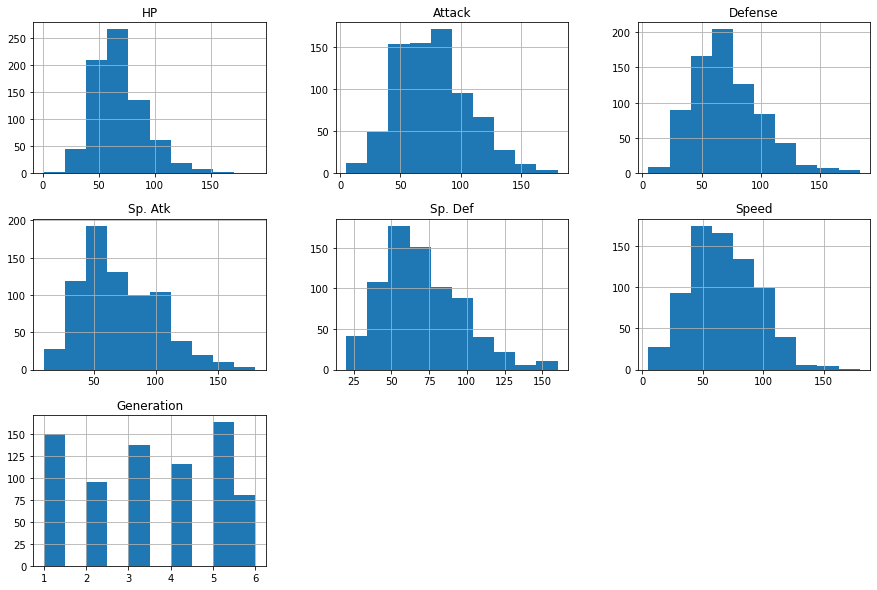

In [19]:
stat_predictors.hist(figsize=(15,10));

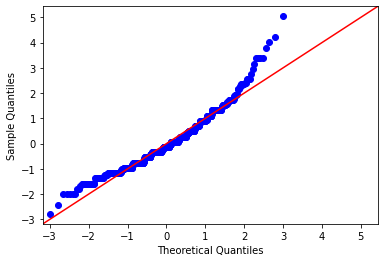

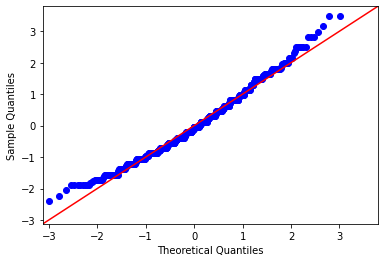

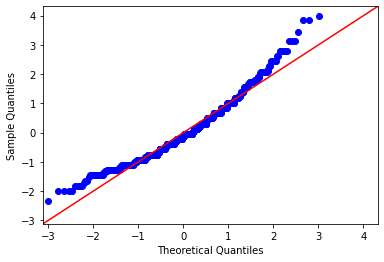

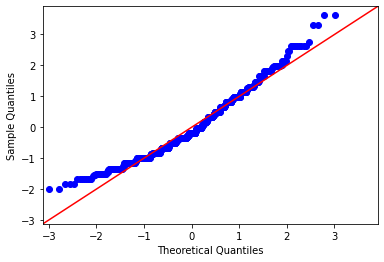

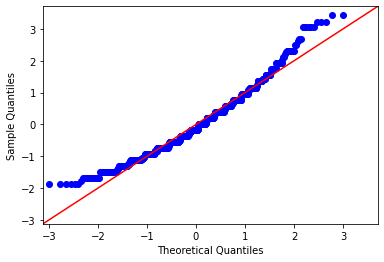

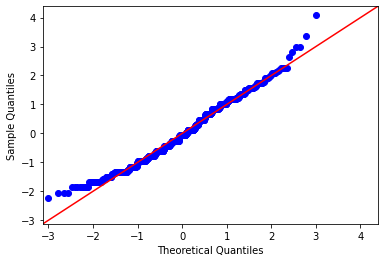

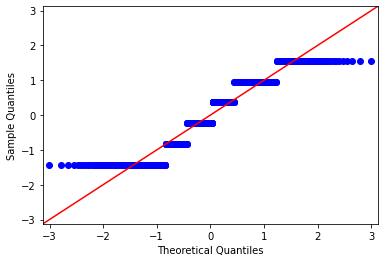

In [20]:
columns = stat_predictors.columns
for c in columns:
    sm.graphics.qqplot(stat_predictors[c], dist=stats.norm, line='45', fit=True)

### One hot encode

In [21]:
# dummy variables
type_dum = pd.get_dummies(pokemon_clean_df['Type 1'], prefix='type', drop_first=True)
gen_dum = pd.get_dummies(pokemon_clean_df['Generation'], prefix='gen', drop_first=True)

# add dummy variables
pokemon_df = pd.concat([stat_predictors.iloc[:,0:6], type_dum, gen_dum], axis=1) 

### Modeling

In [36]:
dependent = pokemon_df['Attack']
predictors = pokemon_df.drop(['Attack'], axis=1)

#### Model 1

In [37]:
#all log transform predictors
predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           5.51e-99
Time:                        23:26:46   Log-Likelihood:                -3301.6
No. Observations:                 745   AIC:                             6659.
Df Residuals:                     717   BIC:                             6788.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6905      4.042      1.160      0.246      -3.245      12.626
HP                0.4007      0.038     10.422      0.000       0.325       0.476
Defense           0.3520      0.036      9.872      0.000       0.282       0.422
Sp. Atk           0.2257      0.037      6.183      0.000       0.154       0.297
Sp. Def          -0.2369      0.040     -5.934      0.000      -0.315      -0.159
Speed             0.2643      0.033      8.110      0.000       0.200       0.328
type_Dark         8.8207      4.756      1.855      0.064      -0.517      18.159
type_Dragon      17.8005      4.954      3.593      0.000       8.074      27.527
type_Electric    -8.8464      4.262     -2.076      0.038     -17.214      -0.479
type_Fairy       -5.8029      5.962     -0.973      0.331     -17.507       5.901
type_Fighting    25.3750      4.952      5.124      0.000      15.653      35.097
type_Fire         2.5728      4.079      0.631      0.528      -5.436      10.581
type_Flying     -10.0214     10.861     -0.923      0.356     -31.344      11.301
type_Ghost       -4.6658      4.706     -0.991      0.322     -13.906       4.574
type_Grass       -2.6114      3.695     -0.707      0.480      -9.866       4.644
type_Ground      14.9784      4.569      3.278      0.001       6.008      23.948
type_Ice         -4.4100      5.171     -0.853      0.394     -14.563       5.743
type_Normal       0.9548      3.474      0.275      0.784      -5.866       7.775
type_Poison       2.8295      4.771      0.593      0.553      -6.538      12.197
type_Psychic    -13.2644      4.050     -3.275      0.001     -21.216      -5.312
type_Rock        12.3956      4.318      2.871      0.004       3.919      20.872
type_Steel        3.5250      5.377      0.656      0.512      -7.031      14.081
type_Water       -5.2075      3.346     -1.556      0.120     -11.777       1.362
gen_2            -0.3794      2.789     -0.136      0.892      -5.854       5.096
gen_3             2.4282      2.510      0.967      0.334      -2.500       7.356
gen_4             1.7709      2.630      0.673      0.501      -3.392       6.934
gen_5             3.7286      2.438      1.529      0.127      -1.058       8.515
gen_6            -1.2777      3.026     -0.422      0.673      -7.218       4.663
==============================================================================
Omnibus:                       59.259   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.412
Skew:                           0.551   Prob(JB):                     1.57e-22
Kurtosis:                       4.421   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [38]:
coefs = pd.DataFrame({
    'coef': model.params.values,
    'pvalue': round(model.pvalues, 2),
    'name': model.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

,coef,pvalue,name
gen_2,-0.379383,0.89,gen_2
type_Normal,0.954756,0.78,type_Normal
gen_6,-1.277710,0.67,gen_6
type_Poison,2.829470,0.55,type_Poison
type_Fire,2.572773,0.53,type_Fire
type_Steel,3.525031,0.51,type_Steel
gen_4,1.770940,0.50,gen_4
type_Grass,-2.611360,0.48,type_Grass
type_Ice,-4.410003,0.39,type_Ice
type_Flying,-10.021413,0.36,type_Flying


In [39]:
drop_columns = coefs[coefs['pvalue'] > 0.05]['name'].values
drop_columns = drop_columns[drop_columns != 'const']
pokemon_df2 = pokemon_df.drop(drop_columns, axis=1)
predictors = pokemon_df2.drop(['Attack'], axis=1)

#### Model 2

In [40]:
#Removed high p-values
predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     70.47
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.97e-107
Time:                        23:26:47   Log-Likelihood:                -3314.3
No. Observations:                 745   AIC:                             6653.
Df Residuals:                     733   BIC:                             6708.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9010      3.084      1.589      0.112      -1.154      10.956
HP                0.4053      0.037     10.963      0.000       0.333       0.478
Defense           0.3606      0.034     10.713      0.000       0.295       0.427
Sp. Atk           0.2121      0.035      6.144      0.000       0.144       0.280
Sp. Def          -0.2507      0.040     -6.336      0.000      -0.328      -0.173
Speed             0.2815      0.031      8.949      0.000       0.220       0.343
type_Dragon      19.4756      4.236      4.598      0.000      11.160      27.791
type_Electric    -7.8479      3.451     -2.274      0.023     -14.623      -1.073
type_Fighting    26.1335      4.322      6.047      0.000      17.649      34.618
type_Ground      16.1127      3.873      4.160      0.000       8.509      23.716
type_Psychic    -11.6910      3.143     -3.719      0.000     -17.862      -5.520
type_Rock        12.9333      3.559      3.634      0.000       5.947      19.920
==============================================================================
Omnibus:                       55.597   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.354
Skew:                           0.553   Prob(JB):                     1.77e-19
Kurtosis:                       4.249   Cond. No.                         942.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pokemon_df2.corr() > 0.75

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,type_Dragon,type_Electric,type_Fighting,type_Ground,type_Psychic,type_Rock
HP,True,False,False,False,False,False,False,False,False,False,False,False
Attack,False,True,False,False,False,False,False,False,False,False,False,False
Defense,False,False,True,False,False,False,False,False,False,False,False,False
Sp. Atk,False,False,False,True,False,False,False,False,False,False,False,False
Sp. Def,False,False,False,False,True,False,False,False,False,False,False,False
Speed,False,False,False,False,False,True,False,False,False,False,False,False
type_Dragon,False,False,False,False,False,False,True,False,False,False,False,False
type_Electric,False,False,False,False,False,False,False,True,False,False,False,False
type_Fighting,False,False,False,False,False,False,False,False,True,False,False,False
type_Ground,False,False,False,False,False,False,False,False,False,True,False,False


#### Standardise data

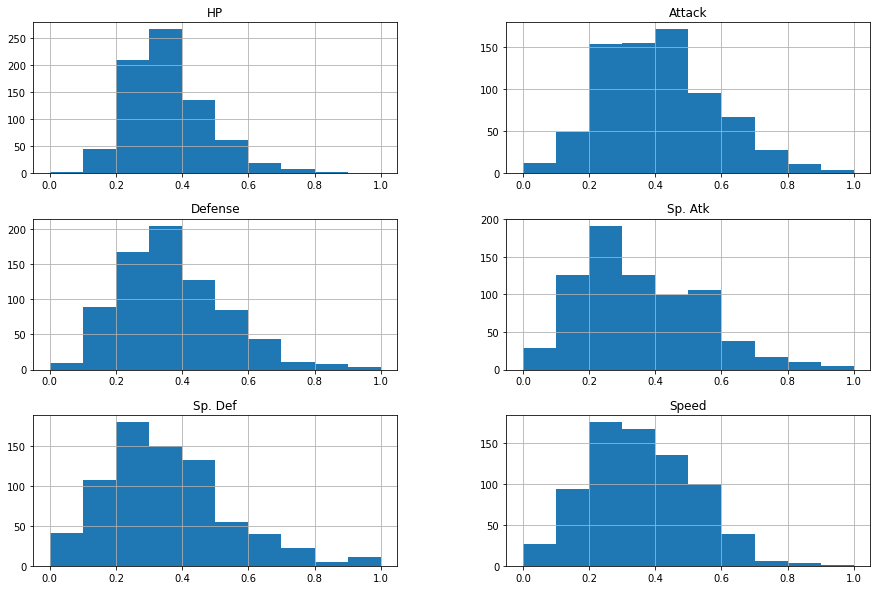

In [42]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(stat_predictors.iloc[:,0:6])
data = pd.DataFrame(scaled, columns=stat_predictors.iloc[:,0:6].columns)
data.hist(figsize=(15,10))
plt.show()

In [44]:
pokemon_df3 = pd.concat([data, predictors.iloc[:,5:11]], axis=1) 
pokemon_df3

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,type_Dragon,type_Electric,type_Fighting,type_Ground,type_Psychic,type_Rock
0,0.232804,0.251429,0.245810,0.323529,0.321429,0.228571,0,0,0,0,0,0
1,0.312169,0.325714,0.324022,0.411765,0.428571,0.314286,0,0,0,0,0,0
2,0.417989,0.440000,0.435754,0.529412,0.571429,0.428571,0,0,0,0,0,0
3,0.201058,0.268571,0.212291,0.294118,0.214286,0.342857,0,0,0,0,0,0
4,0.301587,0.337143,0.296089,0.411765,0.321429,0.428571,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.566138,0.542857,0.648045,0.417647,0.535714,0.514286,1,0,0,0,0,0
741,0.259259,0.542857,0.810056,0.529412,0.928571,0.257143,0,0,0,0,0,1
742,0.417989,0.600000,0.307263,0.823529,0.785714,0.371429,0,0,0,0,1,0
743,0.417989,0.885714,0.307263,0.941176,0.785714,0.428571,0,0,0,0,1,0


#### Model 3

In [45]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     70.47
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.97e-107
Time:                        23:27:57   Log-Likelihood:                -3314.3
No. Observations:                 745   AIC:                             6653.
Df Residuals:                     733   BIC:                             6708.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9010      3.084      1.589      0.112      -1.154      10.956
HP                0.4053      0.037     10.963      0.000       0.333       0.478
Defense           0.3606      0.034     10.713      0.000       0.295       0.427
Sp. Atk           0.2121      0.035      6.144      0.000       0.144       0.280
Sp. Def          -0.2507      0.040     -6.336      0.000      -0.328      -0.173
Speed             0.2815      0.031      8.949      0.000       0.220       0.343
type_Dragon      19.4756      4.236      4.598      0.000      11.160      27.791
type_Electric    -7.8479      3.451     -2.274      0.023     -14.623      -1.073
type_Fighting    26.1335      4.322      6.047      0.000      17.649      34.618
type_Ground      16.1127      3.873      4.160      0.000       8.509      23.716
type_Psychic    -11.6910      3.143     -3.719      0.000     -17.862      -5.520
type_Rock        12.9333      3.559      3.634      0.000       5.947      19.920
==============================================================================
Omnibus:                       55.597   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.354
Skew:                           0.553   Prob(JB):                     1.77e-19
Kurtosis:                       4.249   Cond. No.                         942.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""